In [69]:
%pip install lightgbm





Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy, scipy, pandas, statsmodels
print("NumPy:", numpy.__version__)
print("SciPy:", scipy.__version__)
print("Pandas:", pandas.__version__)
print("Statsmodels:", statsmodels.__version__)

NumPy: 1.26.4
SciPy: 1.11.4
Pandas: 2.2.2
Statsmodels: 0.14.1


In [39]:
import numpy
print(numpy.__version__)

1.26.4


In [376]:
import sqlite3
import pandas as pd
import os
import joblib
# 1. Connect to your SQLite database
# Replace "your_database.db" with your actual .db file path
db_path = "MIG_Cement_Records.db"
conn = sqlite3.connect(db_path)

# 2. Write your SQL query
query = "SELECT * FROM sqlite_master;"

# 3. Fetch into a DataFrame
df = pd.read_sql_query(query, conn)

# 4. Display the data
print(df.head())

    type                            name     tbl_name  rootpage  \
0  table                           Sites        Sites         2   
1  index        sqlite_autoindex_Sites_1        Sites         3   
2  table                     CementTypes  CementTypes         4   
3  index  sqlite_autoindex_CementTypes_1  CementTypes         5   
4  table                      Operations   Operations         6   

                                                 sql  
0  CREATE TABLE Sites (\n    site_id TEXT PRIMARY...  
1                                               None  
2  CREATE TABLE CementTypes (\n    cement_type TE...  
3                                               None  
4  CREATE TABLE Operations (\n    date TEXT,\n   ...  


In [377]:
# for table in ["Sites", "CementTypes", "Operations"]:
#     query = f"PRAGMA table_info({table});"
#     print(f"\nColumns in {table}:")
#     print(pd.read_sql_query(query, conn))

for table in ["Sites", "CementTypes", "Operations"]:
    print(f"\nPreview of {table}:")
    print(pd.read_sql_query(f"SELECT * FROM {table} LIMIT 5;", conn))


Preview of Sites:
    site_id region  silo_capacity      behavior
0  SITE_001  North            448    aggressive
1  SITE_002  South            288  conservative
2  SITE_003   East            314    aggressive
3  SITE_004  South            472  conservative
4  SITE_005  South            230    aggressive

Preview of CementTypes:
  cement_type
0       CEM_I
1      CEM_II
2     CEM_III

Preview of Operations:
         date   site_id cement_type  planned_pour_tonnes  consumed_tonnes  \
0  2022-01-01  SITE_001      CEM_II                43.18            34.54   
1  2022-01-02  SITE_001       CEM_I                45.26            45.26   
2  2022-01-03  SITE_001     CEM_III                38.69            38.69   
3  2022-01-04  SITE_001       CEM_I                33.16            33.16   
4  2022-01-05  SITE_001     CEM_III                56.88            47.04   

   opening_inventory_tonnes  deliveries_tonnes  closing_inventory_tonnes  \
0                     52.56              45.83   

In [378]:
query = """
SELECT 
    o.date,
    o.site_id,
    s.region,
    s.behavior,
    o.cement_type,
    o.planned_pour_tonnes,
    o.consumed_tonnes,
    o.opening_inventory_tonnes,
    o.deliveries_tonnes,
    o.closing_inventory_tonnes,
    o.rain_mm,
    o.avg_temp_c,
    o.silo_capacity
FROM Operations o
JOIN Sites s ON o.site_id = s.site_id
JOIN CementTypes c ON o.cement_type = c.cement_type;
"""

df_joined = pd.read_sql_query(query, conn)
print(df_joined)  # Should now show (32880, 11) if that’s the actual data
# conn.close()



             date   site_id region    behavior cement_type  \
0      2022-01-01  SITE_001  North  aggressive      CEM_II   
1      2022-01-02  SITE_001  North  aggressive       CEM_I   
2      2022-01-03  SITE_001  North  aggressive     CEM_III   
3      2022-01-04  SITE_001  North  aggressive       CEM_I   
4      2022-01-05  SITE_001  North  aggressive     CEM_III   
...           ...       ...    ...         ...         ...   
32875  2024-12-27  SITE_030  South  aggressive     CEM_III   
32876  2024-12-28  SITE_030  South  aggressive       CEM_I   
32877  2024-12-29  SITE_030  South  aggressive     CEM_III   
32878  2024-12-30  SITE_030  South  aggressive      CEM_II   
32879  2024-12-31  SITE_030  South  aggressive       CEM_I   

       planned_pour_tonnes  consumed_tonnes  opening_inventory_tonnes  \
0                    43.18            34.54                     52.56   
1                    45.26            45.26                     63.85   
2                    38.69          

In [379]:
# Save DataFrame to CSV
df_joined.to_csv("cement_records_joined.csv", index=False)

print("Data saved to cement_records_joined.csv")

Data saved to cement_records_joined.csv


In [380]:
df = pd.read_csv("cement_records_joined.csv")
df.head()

,date,site_id,region,behavior,cement_type,planned_pour_tonnes,consumed_tonnes,opening_inventory_tonnes,deliveries_tonnes,closing_inventory_tonnes,rain_mm,avg_temp_c,silo_capacity
0,2022-01-01,SITE_001,North,aggressive,CEM_II,43.18,34.54,52.56,45.83,63.85,3.40,-3.10,448
1,2022-01-02,SITE_001,North,aggressive,CEM_I,45.26,45.26,63.85,19.97,38.56,3.23,14.28,448
2,2022-01-03,SITE_001,North,aggressive,CEM_III,38.69,38.69,38.56,47.19,47.06,2.64,6.40,448
3,2022-01-04,SITE_001,North,aggressive,CEM_I,33.16,33.16,47.06,18.74,32.64,8.25,14.23,448
4,2022-01-05,SITE_001,North,aggressive,CEM_III,56.88,47.04,32.64,14.40,0.00,2.69,8.97,448


In [381]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32880 entries, 0 to 32879
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      32880 non-null  object 
 1   site_id                   32880 non-null  object 
 2   region                    32880 non-null  object 
 3   behavior                  32880 non-null  object 
 4   cement_type               32880 non-null  object 
 5   planned_pour_tonnes       32880 non-null  float64
 6   consumed_tonnes           32880 non-null  float64
 7   opening_inventory_tonnes  32880 non-null  float64
 8   deliveries_tonnes         32880 non-null  float64
 9   closing_inventory_tonnes  32880 non-null  float64
 10  rain_mm                   32880 non-null  float64
 11  avg_temp_c                32880 non-null  float64
 12  silo_capacity             32880 non-null  int64  
dtypes: float64(7), int64(1), object(5)
memory usage: 3.3+ MB


In [382]:
df['date'] = pd.to_datetime(df['date'])

In [383]:
print("shape:",df.shape)
display(df.columns.tolist())
display(df.isnull().sum())

shape: (32880, 13)


['date',
 'site_id',
 'region',
 'behavior',
 'cement_type',
 'planned_pour_tonnes',
 'consumed_tonnes',
 'opening_inventory_tonnes',
 'deliveries_tonnes',
 'closing_inventory_tonnes',
 'rain_mm',
 'avg_temp_c',
 'silo_capacity']

date                        0
site_id                     0
region                      0
behavior                    0
cement_type                 0
planned_pour_tonnes         0
consumed_tonnes             0
opening_inventory_tonnes    0
deliveries_tonnes           0
closing_inventory_tonnes    0
rain_mm                     0
avg_temp_c                  0
silo_capacity               0
dtype: int64

In [384]:
numerical_col = df.select_dtypes(include=["int64",'float64']).columns
numerical_col

Index(['planned_pour_tonnes', 'consumed_tonnes', 'opening_inventory_tonnes',
       'deliveries_tonnes', 'closing_inventory_tonnes', 'rain_mm',
       'avg_temp_c', 'silo_capacity'],
      dtype='object')

In [385]:
(df[numerical_col] < 0).sum()

planned_pour_tonnes            0
consumed_tonnes                0
opening_inventory_tonnes       0
deliveries_tonnes              0
closing_inventory_tonnes       0
rain_mm                        0
avg_temp_c                  4551
silo_capacity                  0
dtype: int64

In [386]:
df['inventory_check'] = (
    df['opening_inventory_tonnes'] + df['deliveries_tonnes'] -df['consumed_tonnes']).round(2) == df['closing_inventory_tonnes'].round(2)

df['inventory_check'].mean()

0.999787104622871

In [387]:
df["stock_out"] = df["planned_pour_tonnes"] >(df['closing_inventory_tonnes'] + df['deliveries_tonnes'])

In [388]:
df['over_capacity'] = df['closing_inventory_tonnes'] > df['silo_capacity']

In [389]:
# df['idle'] = ((df['planned_pour_tonnes'] == 0 & df['deliveries_tonnes'] == 0))

df['idle'] = (df['planned_pour_tonnes'] == 0) & (df['deliveries_tonnes'] == 0)


In [390]:
df['waste_risk'] = (df['closing_inventory_tonnes'] > 0.85 * df['silo_capacity']) & (df['planned_pour_tonnes'] < 5)


In [391]:
df['pour_disrupted'] = (df['planned_pour_tonnes'] > 0) & (df['consumed_tonnes'] == 0)

In [392]:
kpi_summary = df.groupby('site_id').agg(
    total_days =("date",'count'),
    total_consumed_tonnes =('consumed_tonnes','sum'),
    avg_daily_consumed = ('consumed_tonnes','mean'),
    stockout_pct = ('stock_out',lambda x : round(x.mean()*100,2)),
    overcapacity = ('over_capacity',lambda x : round(x.mean()*100,2)),
    idle_pct = ('idle',lambda x : round(x.mean()*100,2)),
    waste_risk_pct = ('waste_risk',lambda x : round(x.mean()*100,2)),
    pour_disrupted_pct = ('pour_disrupted',lambda x : round(x.mean()*100,2)),
    silo_capacity = ('silo_capacity','first'),
    region = ('region','first')
).reset_index()



kpi_summary.head()

,site_id,total_days,total_consumed_tonnes,avg_daily_consumed,stockout_pct,overcapacity,idle_pct,waste_risk_pct,pour_disrupted_pct,silo_capacity,region
0,SITE_001,1096,33056.40,30.160949,59.95,0.00,0.0,0.00,4.84,448,North
1,SITE_002,1096,12900.44,11.770474,0.00,98.81,0.0,3.56,0.00,288,South
2,SITE_003,1096,32520.09,29.671615,59.03,0.00,0.0,0.00,5.75,314,East
3,SITE_004,1096,12618.50,11.513230,0.00,98.08,0.0,4.93,0.00,472,South
4,SITE_005,1096,32935.68,30.050803,61.86,0.00,0.0,0.00,4.38,230,South


Top 5 Sites by Avg Daily Consumption:
     site_id  avg_daily_consumed region
24  SITE_025           30.660639  South
9   SITE_010           30.638467   West
17  SITE_018           30.427089   East
0   SITE_001           30.160949  North
20  SITE_021           30.118321   East


TypeError: 'str' object is not callable

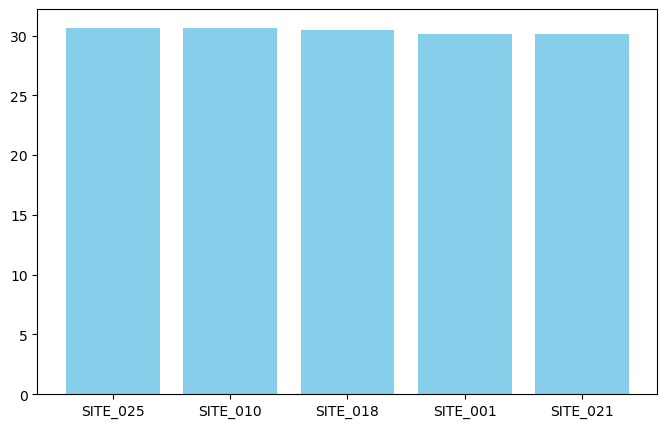

In [393]:
# Top 5 Sites by Average Daily Consumption

top5_consumption = kpi_summary.sort_values(
    by="avg_daily_consumed", ascending=False
).head(5)

print("Top 5 Sites by Avg Daily Consumption:")
print(top5_consumption[["site_id", "avg_daily_consumed", "region"]])


import matplotlib.pyplot as plt

top5_consumption = kpi_summary.nlargest(5, "avg_daily_consumed")

plt.figure(figsize=(8,5))
plt.bar(top5_consumption["site_id"], top5_consumption["avg_daily_consumed"], color="skyblue")
plt.title("Top 5 Sites by Avg Daily Consumption")
plt.xlabel("Site ID")
plt.ylabel("Avg Daily Consumption (tonnes)")
plt.xticks(rotation=45)
plt.show()

In [394]:
# Worst 5 Sites by Stockout %

worst5_stockout = kpi_summary.sort_values(
    by="stockout_pct", ascending=False
).head(5)

print("Worst 5 Sites by Stockout %:")
print(worst5_stockout[["site_id", "stockout_pct", "region"]])




Worst 5 Sites by Stockout %:
     site_id  stockout_pct region
10  SITE_011         65.51  South
21  SITE_022         63.87  South
20  SITE_021         63.69   East
7   SITE_008         63.59   West
19  SITE_020         63.41  South


Top 5 Sites by Total Consumption:
     site_id  total_consumed_tonnes region
24  SITE_025               33604.06  South
9   SITE_010               33579.76   West
17  SITE_018               33348.09   East
0   SITE_001               33056.40  North
20  SITE_021               33009.68   East


TypeError: 'str' object is not callable

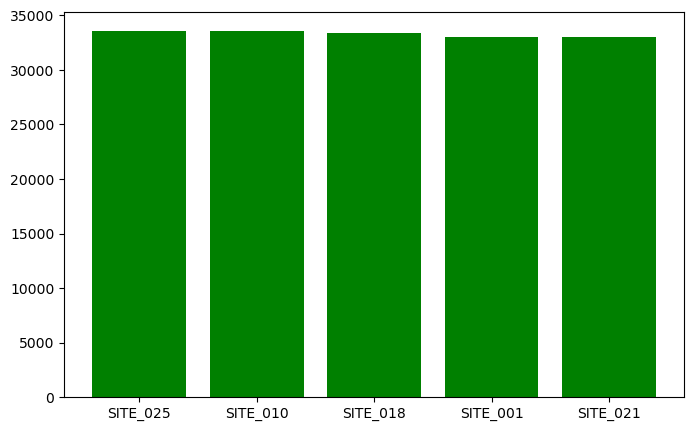

In [395]:
# Sites with Highest Pour Disruption

top5_total1 = kpi_summary.nlargest(5, "total_consumed_tonnes")
print("Top 5 Sites by Total Consumption:")
print(top5_total1[["site_id", "total_consumed_tonnes", "region"]])


top5_total = kpi_summary.nlargest(15, "total_consumed_tonnes")

plt.figure(figsize=(8,5))
plt.bar(top5_total1["site_id"], top5_total1["total_consumed_tonnes"], color="green")
plt.title("Top 5 Sites by Highest pour Distrption")
plt.xlabel("Site ID")
plt.ylabel("Total Consumed (tonnes)")
plt.xticks(rotation=45)
plt.show()



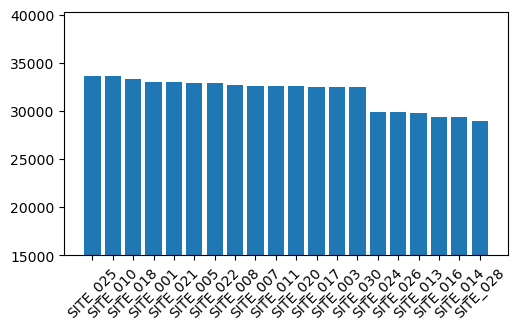

In [396]:

top_site =kpi_summary.sort_values('total_consumed_tonnes', ascending = False).head(20)
plt.figure(figsize=(15,6))
plt.subplot(2,3,2)
plt.bar(top_site['site_id'],top_site['total_consumed_tonnes'])
plt.title =("Top 20 sited by total cement consumption")
plt.xticks(rotation=45)
plt.ylim(15000, top_site['total_consumed_tonnes'].max() *1.2)
plt.tight_layout()
plt.show()

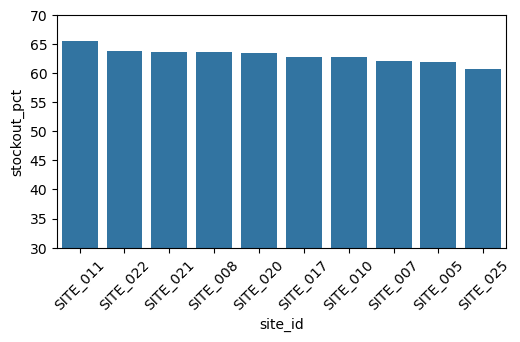

In [397]:
import  seaborn as sns

risk_site =kpi_summary.sort_values('stockout_pct', ascending = False).head(10)
plt.figure(figsize=(15,6))
plt.subplot(2,3,2)
sns.barplot(x ='site_id',y='stockout_pct',data = risk_site)
plt.title =("Top 10 sited by stockout Risk %")
plt.xticks(rotation=45)
plt.ylim(30,70)
# plt.ylim(15000, top_site['total_consumed_tonnes'].max() *1.2)
plt.tight_layout()
plt.show()

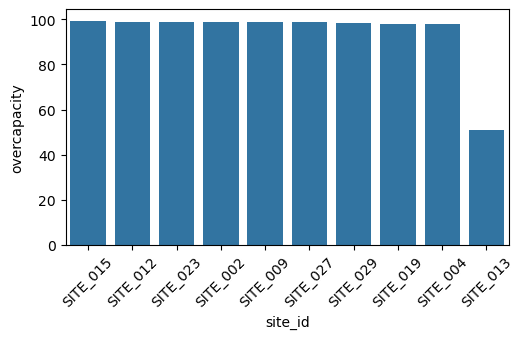

In [398]:

overcapacity_site =kpi_summary.sort_values('overcapacity', ascending = False).head(10)
plt.figure(figsize=(15,6))
plt.subplot(2,3,2)
sns.barplot(x ='site_id',y='overcapacity',data = overcapacity_site)
plt.title =("Top 10 sited by overcapacity_pct %")
plt.xticks(rotation=45)
# plt.ylim(10,60)
# plt.ylim(15000, top_site['total_consumed_tonnes'].max() *1.2)
plt.tight_layout()
plt.show()

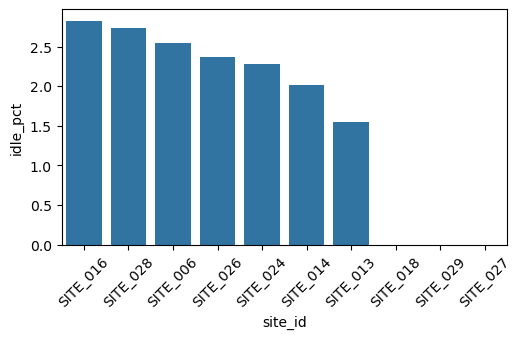

In [399]:
idle_site =kpi_summary.sort_values('idle_pct', ascending = False).head(10)
plt.figure(figsize=(15,6))
plt.subplot(2,3,2)
sns.barplot(x ='site_id',y='idle_pct',data = idle_site)
plt.title =("Top 10 sited by IDLE")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

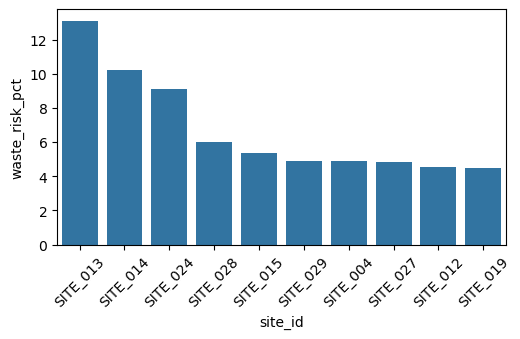

In [400]:
waste_site =kpi_summary.sort_values('waste_risk_pct', ascending = False).head(10)
plt.figure(figsize=(15,6))
plt.subplot(2,3,2)
sns.barplot(x ='site_id',y='waste_risk_pct',data = waste_site)
plt.title=("Top 10 sited by Waste Risk %")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [401]:
df['utilization+pct'] = df['closing_inventory_tonnes'] / df['silo_capacity']

In [402]:
utilization_summary = df.groupby('site_id')['utilization+pct'].mean().sort_values(ascending=False)

<Axes: title={'center': 'average silo utilization by site'}, xlabel='site_id'>

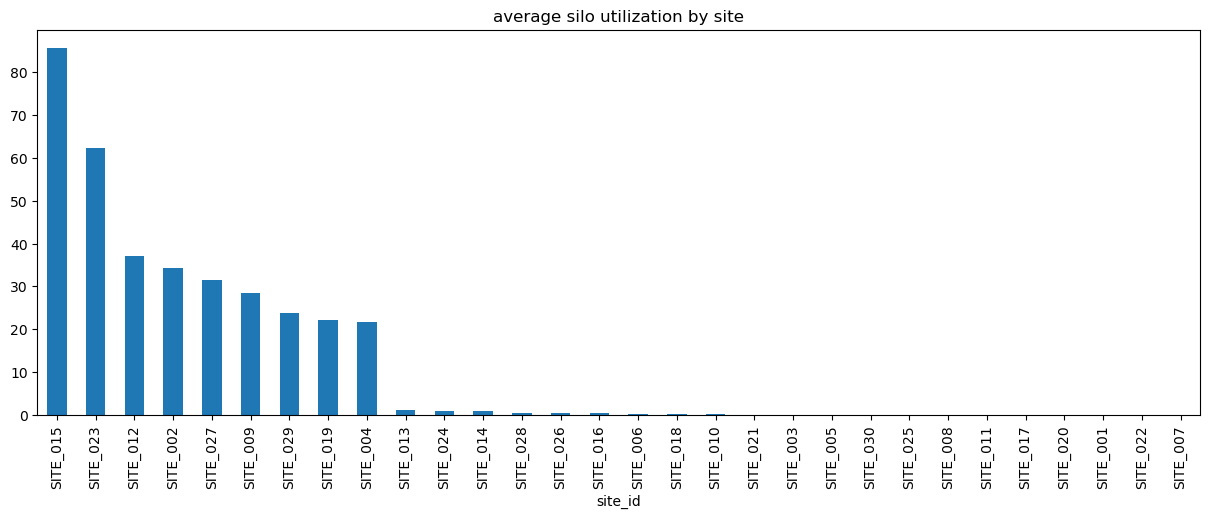

In [403]:
utilization_summary.plot(kind = 'bar' , title='average silo utilization by site',figsize=(15,5))

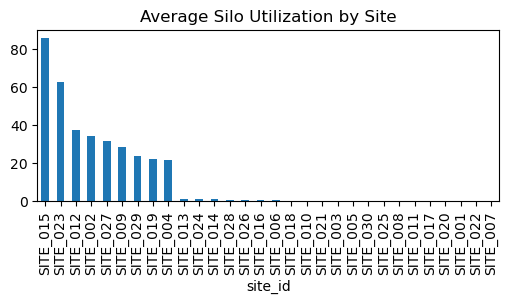

In [404]:
plt.figure(figsize=(15,5))

# Create subplot slot (2 rows, 3 columns, position 2)
ax = plt.subplot(2,3,2)

# Plot on that axis
utilization_summary.plot(
    kind="bar",
    x="site_id",
    y="avg_silo_utilization",   # change to your column
    title="Average Silo Utilization by Site",
    ax=ax
)

plt.tight_layout()
plt.show()


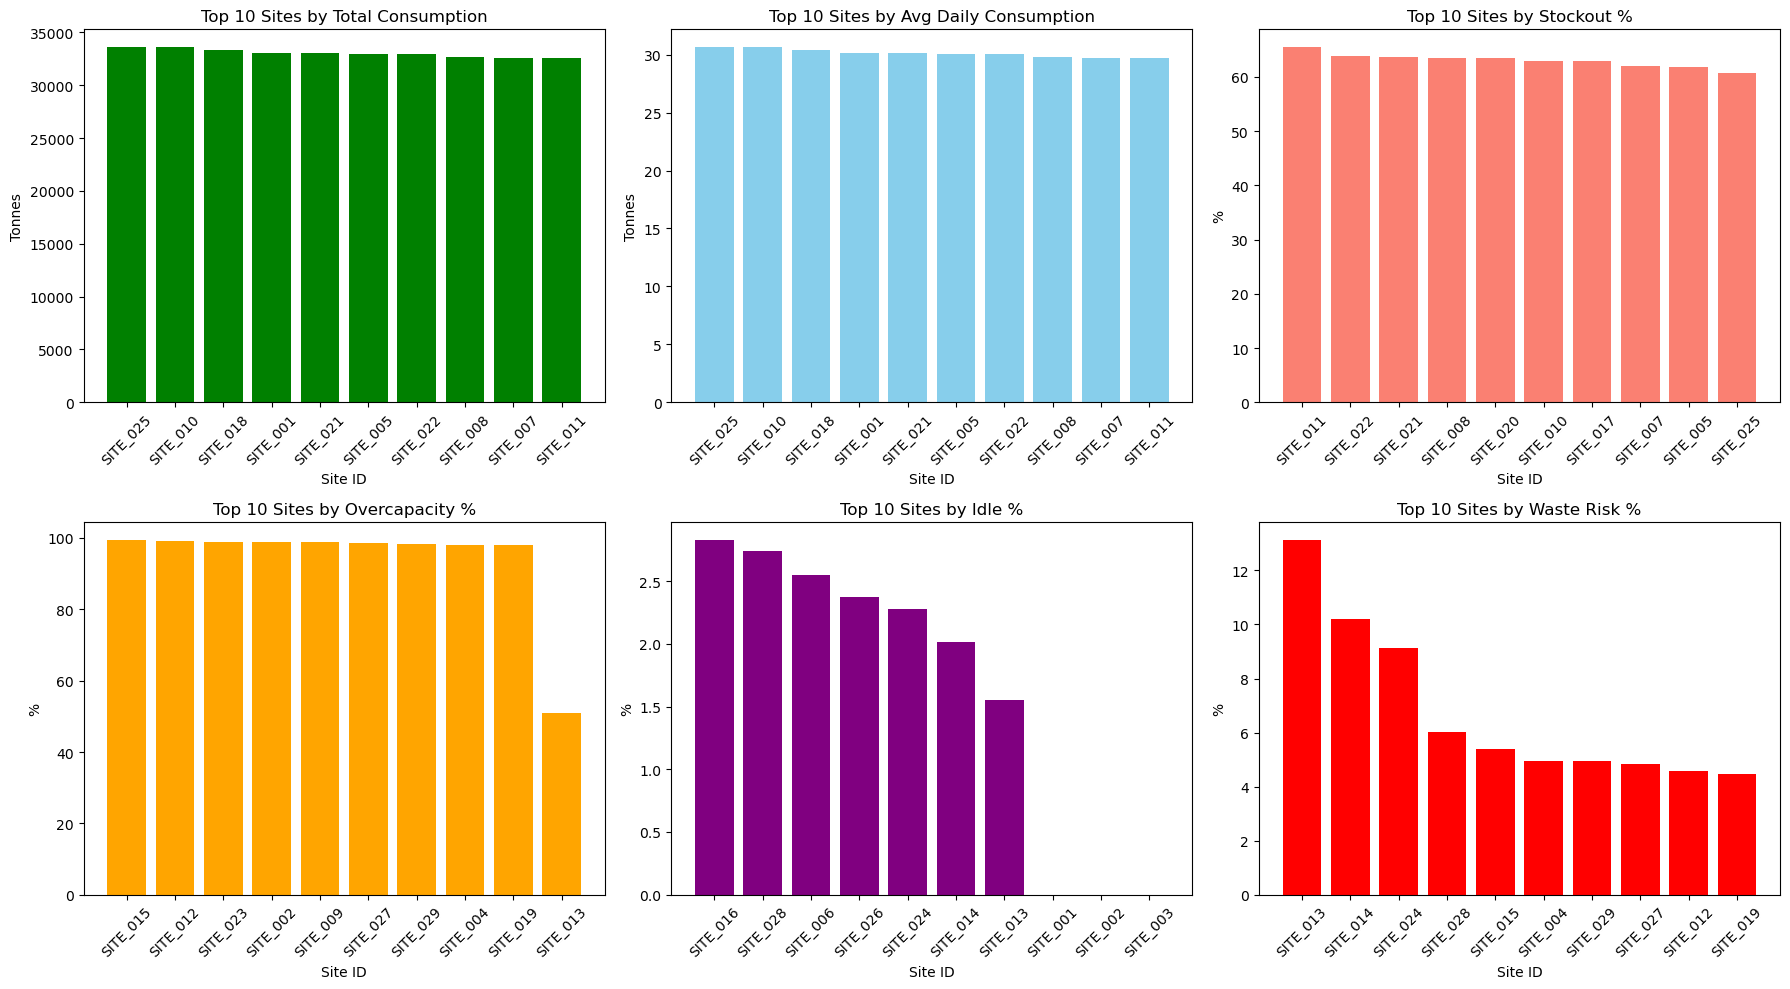

In [405]:
import matplotlib.pyplot as plt

# Select top 10 sites for each KPI
top10_consumed = kpi_summary.nlargest(10, "total_consumed_tonnes")
top10_avg = kpi_summary.nlargest(10, "avg_daily_consumed")
top10_stockout = kpi_summary.nlargest(10, "stockout_pct")
top10_overcap = kpi_summary.nlargest(10, "overcapacity")
top10_idle = kpi_summary.nlargest(10, "idle_pct")
top10_waste = kpi_summary.nlargest(10, "waste_risk_pct")

# Create dashboard grid (2 rows x 3 cols)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# --- Plot 1: Total Consumption ---
axes[0,0].bar(top10_consumed["site_id"], top10_consumed["total_consumed_tonnes"], color="green")
axes[0,0].set_title("Top 10 Sites by Total Consumption")
axes[0,0].set_xlabel("Site ID")
axes[0,0].set_ylabel("Tonnes")
axes[0,0].tick_params(axis="x", rotation=45)

# --- Plot 2: Avg Daily Consumption ---
axes[0,1].bar(top10_avg["site_id"], top10_avg["avg_daily_consumed"], color="skyblue")
axes[0,1].set_title("Top 10 Sites by Avg Daily Consumption")
axes[0,1].set_xlabel("Site ID")
axes[0,1].set_ylabel("Tonnes")
axes[0,1].tick_params(axis="x", rotation=45)

# --- Plot 3: Stockout % ---
axes[0,2].bar(top10_stockout["site_id"], top10_stockout["stockout_pct"], color="salmon")
axes[0,2].set_title("Top 10 Sites by Stockout %")
axes[0,2].set_xlabel("Site ID")
axes[0,2].set_ylabel("%")
axes[0,2].tick_params(axis="x", rotation=45)

# --- Plot 4: Overcapacity % ---
axes[1,0].bar(top10_overcap["site_id"], top10_overcap["overcapacity"], color="orange")
axes[1,0].set_title("Top 10 Sites by Overcapacity %")
axes[1,0].set_xlabel("Site ID")
axes[1,0].set_ylabel("%")
axes[1,0].tick_params(axis="x", rotation=45)

# --- Plot 5: Idle % ---
axes[1,1].bar(top10_idle["site_id"], top10_idle["idle_pct"], color="purple")
axes[1,1].set_title("Top 10 Sites by Idle %")
axes[1,1].set_xlabel("Site ID")
axes[1,1].set_ylabel("%")
axes[1,1].tick_params(axis="x", rotation=45)

# --- Plot 6: Waste Risk % ---
axes[1,2].bar(top10_waste["site_id"], top10_waste["waste_risk_pct"], color="red")
axes[1,2].set_title("Top 10 Sites by Waste Risk %")
axes[1,2].set_xlabel("Site ID")
axes[1,2].set_ylabel("%")
axes[1,2].tick_params(axis="x", rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


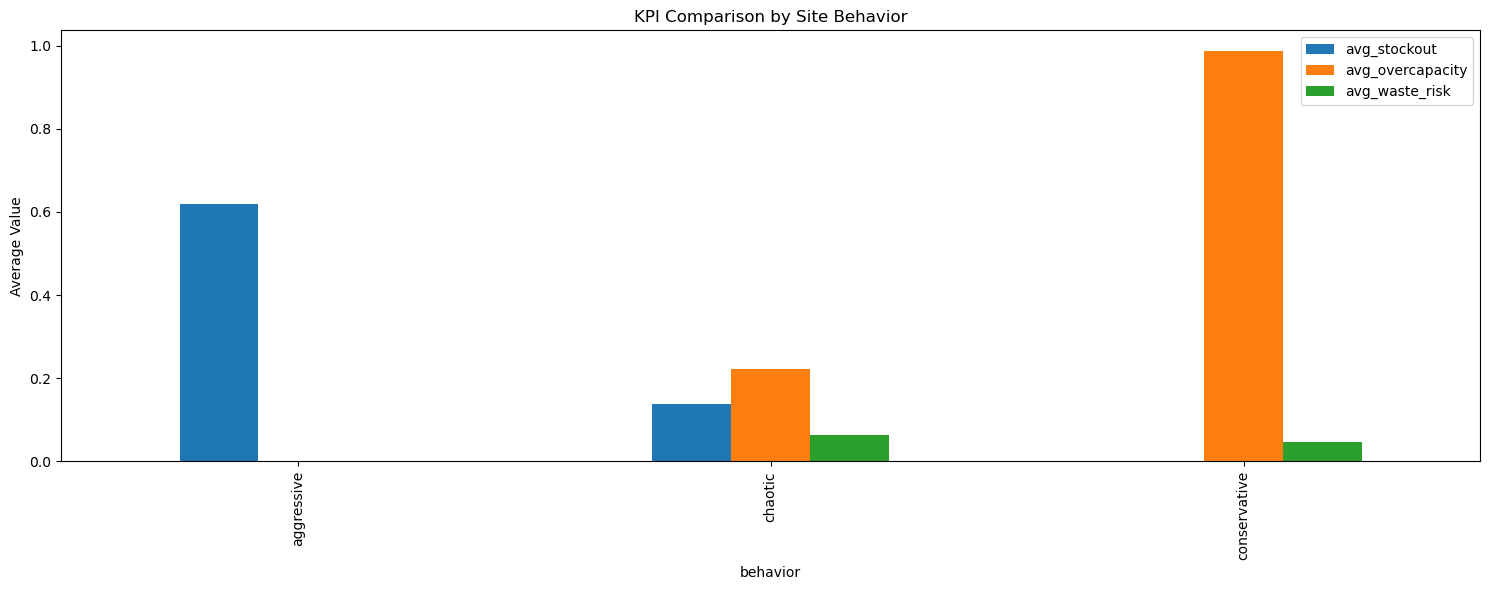

In [406]:
behavior_kpi = df.groupby('behavior').agg(
    avg_stockout=('stock_out', 'mean'),
    avg_overcapacity=('over_capacity', 'mean'),
    avg_waste_risk=('waste_risk', 'mean')
)
# behavior_kpi.plot(kind='bar',figsize(15,6),title='kpi Comparison by site behavious')

behavior_kpi.plot(
    kind='bar',
    figsize=(15,6),
    title='KPI Comparison by Site Behavior'
)

plt.xticks(rotation=90)
plt.ylabel("Average Value")
plt.tight_layout()
plt.show()




In [407]:
#kpi comparison by site Behavior
#Comparison key performace indicator across different site Behavior to identify trends

site_usage = df.groupby('site_id')['consumed_tonnes'].sum().sort_values(ascending=False)

total_usage = site_usage.sum()
top5=site_usage.head(5)
top5_share = round(top5.sum() / total_usage * 100,2)

display(top5)
display(top5_share)

site_id
SITE_025    33604.06
SITE_010    33579.76
SITE_018    33348.09
SITE_001    33056.40
SITE_021    33009.68
Name: consumed_tonnes, dtype: float64

21.36

In [408]:
# Group by site and take mean of selected columns
site_usage = df.groupby('site_id')[['closing_inventory_tonnes', 'planned_pour_tonnes']].mean()

# Sort by closing inventory (you can also sort by 'stockout_pct' if you prefer)
site_usage = site_usage.sort_values('closing_inventory_tonnes', ascending=False)

# Total usage for closing inventory
total_usage = site_usage['closing_inventory_tonnes'].sum()

# Top 5 sites
top5 = site_usage.head(10)

# Percentage share of top 5 sites
top5_share = round(top5['closing_inventory_tonnes'].sum() / total_usage * 100, 2)

display(top5)
display(top5_share)


,closing_inventory_tonnes,planned_pour_tonnes
site_id,,
SITE_029,10387.101907,11.829407
SITE_019,10305.583349,11.835867
SITE_015,10282.268139,11.495876
SITE_004,10255.298248,11.874872
SITE_012,10170.920301,11.681277
SITE_009,10016.697108,12.030849
SITE_027,9875.467108,11.833896
SITE_002,9873.164489,12.131223
SITE_023,9551.627801,12.182664


98.7

<Axes: title={'center': 'Cement Type Demand Share'}, ylabel='consumed_tonnes'>

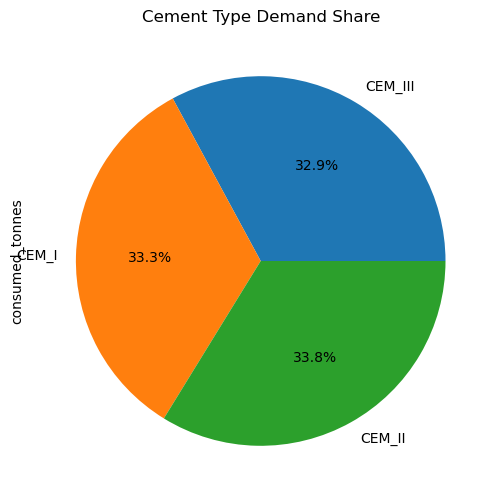

In [409]:
#cement Type Demand share
#Understanding which cement types most consumed to optimize inventory chain.
cement_demand =df.groupby('cement_type')["consumed_tonnes"].sum().sort_values()
cement_demand.plot(kind='pie',autopct='%1.1f%%',figsize=(6,6),title='Cement Type Demand Share')

<Axes: title={'center': 'Monthly cemnet Demand Seasonality'}, xlabel='month'>

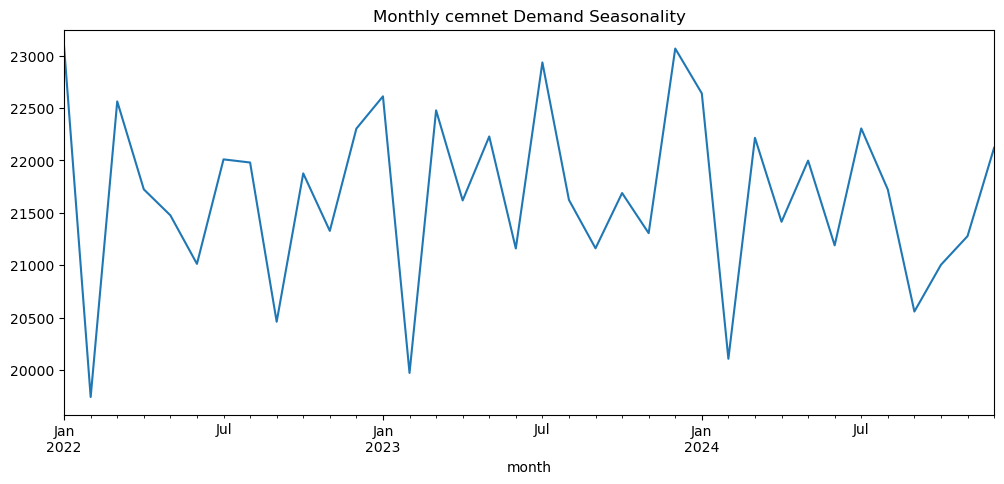

In [410]:
#Monthly Cement Demand Seasionality
#Identifying seasonal treds in cement comparison to better plan logistic abd inventory.
df["month"] = df['date'].dt.to_period("M")
monthly_demand = df.groupby('month')['consumed_tonnes'].sum()
monthly_demand.plot(figsize=(12,5),title='Monthly cemnet Demand Seasonality')

MODELIMG

In [411]:
import warnings
warnings.filterwarnings("ignore")

In [412]:
site_id = 'SITE_001'
site_df = df[df['site_id'] == site_id].copy()
site_df.set_index('date',inplace=True)
site_df = site_df.sort_index()

In [413]:
y = site_df['consumed_tonnes']

X = site_df[['planned_pour_tonnes', 'rain_mm', 'avg_temp_c']]

# Train-test split first
split_index = int(len(site_df) * 0.8)
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(865, 16) (876,)
(217, 16) (220,)


In [414]:
from statsmodels.tsa.ar_model import AutoReg

# Train-test split first
split_index = int(len(site_df) * 0.8)
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

# Fit AutoReg (only y, no exog allowed here)
model = AutoReg(y_train, lags=12)
results = model.fit()

print(results.summary())

# Forecast same length as y_test
# ar_forecast = results.predict(
#     start=y_test.index[0], 
#     end=y_test.index[-1]
# )

ar_forecast = results.predict(
    start=y_test.index[0], 
    end=y_test.index[-1]
)

# Align forecast index with y_test
ar_forecast = pd.Series(ar_forecast, index=y_test.index)


                            AutoReg Model Results                             
Dep. Variable:        consumed_tonnes   No. Observations:                  876
Model:                    AutoReg(12)   Log Likelihood               -3538.428
Method:               Conditional MLE   S.D. of innovations             14.534
Date:                Fri, 12 Sep 2025   AIC                           7104.855
Time:                        14:16:14   BIC                           7171.517
Sample:                    01-13-2022   HQIC                          7130.370
                         - 05-25-2024                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  43.4557      4.414      9.846      0.000      34.805      52.106
consumed_tonnes.L1     -0.0021      0.034     -0.061      0.951      -0.069       0.065
consumed_tonnes.

In [415]:
ar_forecast

date
2024-05-26    28.531087
2024-05-27    30.962267
2024-05-28    30.012847
2024-05-29    31.439491
2024-05-30    30.499731
                ...    
2024-12-27    30.526993
2024-12-28    30.526993
2024-12-29    30.526993
2024-12-30    30.526993
2024-12-31    30.526993
Length: 220, dtype: float64

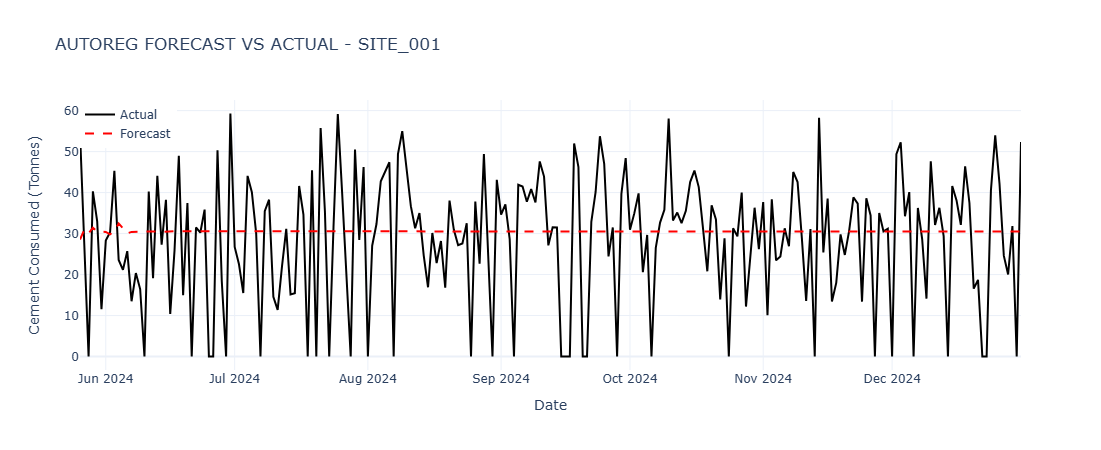

In [417]:
import plotly.express as px
import plotly.graph_objects as go

import plotly.graph_objects as go

# Create figure
fig = go.Figure()

# Actual values
fig.add_trace(go.Scatter(
    x=y_test.index,
    y=y_test,
    mode='lines',
    name="Actual",
    line=dict(color='black')
))

# Forecasted values
fig.add_trace(go.Scatter(
    x=y_test.index,
    y=ar_forecast,
    mode='lines',
    name="Forecast",
    line=dict(color='red', dash='dash')
))

# Layout customization
fig.update_layout(
    title=f'AUTOREG FORECAST VS ACTUAL - {site_id}',
    xaxis_title="Date",
    yaxis_title="Cement Consumed (Tonnes)",
    legend=dict(x=0, y=1),
    template='plotly_white',
    width=1000,
    height=450
)

fig.show()


In [418]:
# Train-test split
split_index = int(len(site_df) * 0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(876, 3) (876,)
(220, 3) (220,)


In [419]:
from lightgbm import LGBMRegressor

model = LGBMRegressor(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)

model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000079 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 876, number of used features: 3
[LightGBM] [Info] Start training from score 30.567180


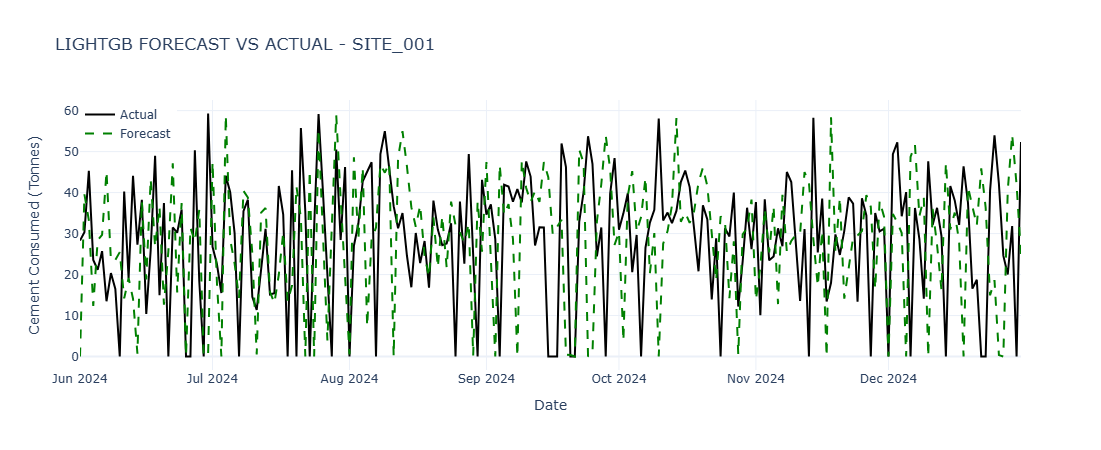

In [443]:
#visualisation SARIMAX Forecast Vs actual
fig = go.Figure()

# Actual Values
fig.add_trace(go.Scatter(
    x=y_test.index,
    y=y_test,
    mode='lines',
    name="Actual",
    line=dict(color='black')
))

# Forecast Values
fig.add_trace(go.Scatter(
    x=y_test.index,
    y=rf_forecast,
    mode='lines',
    name='Forecast',
    line=dict(color='green', dash='dash')
))

# Layout
fig.update_layout(
    title=f'LIGHTGB FORECAST VS ACTUAL - {site_id}',
    xaxis_title="Date",
    yaxis_title="Cement Consumed (Tonnes)",
    legend=dict(x=0, y=1),
    template='plotly_white',
    width=1000,
    height=450
)

fig.show()

In [421]:
# Evaluation Metrics
import numpy as np
from sklearn.metrics import mean_squared_error

def print_metrics(y_true, y_pred, label):
    mask = y_true != 0
    mape = np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{label} - MAPE: {mape:.2f}%, RMSE: {rmse:.2f} tonnes")


# Comparing SARIMAX and Random Forest
print_metrics(y_test,ar_forecast, "AUTOREG")
print_metrics(y_test, y_pred, "LIGHTGB Forest")

AUTOREG - MAPE: 32.99%, RMSE: 15.81 tonnes
LIGHTGB Forest - MAPE: 35.35%, RMSE: 10.82 tonnes


In [435]:

# --- Feature Engineering ---

# Lag features
site_df["lag_1"] = site_df['consumed_tonnes'].shift(1)
site_df["lag_3"] = site_df['consumed_tonnes'].shift(3)
site_df["lag_7"] = site_df['consumed_tonnes'].shift(7)

# Rolling statistics
site_df['rolling_mean_3'] = site_df['consumed_tonnes'].rolling(3).mean()
site_df['rolling_std_7'] = site_df['consumed_tonnes'].rolling(7).std()

# Date-based features
site_df['day_of_week'] = site_df.index.dayofweek
site_df['week_of_year'] = site_df.index.isocalendar().week.astype(int)

# Interaction features
site_df['rain_x_pour'] = site_df['rain_mm'] * site_df['planned_pour_tonnes']
site_df['temp_x_pour'] = site_df['avg_temp_c'] * site_df['planned_pour_tonnes']

# Inventory features
site_df['inventory_gap'] = (
    site_df['opening_inventory_tonnes'] + site_df['deliveries_tonnes'] - site_df['planned_pour_tonnes']
)
site_df['inventory_ratio'] = site_df['closing_inventory_tonnes'] / site_df['silo_capacity']

# Encoding categorical variables
site_df['behavior_encoded'] = site_df['behavior'].astype('category').cat.codes
site_df['cement_type_encoded'] = site_df['cement_type'].astype('category').cat.codes

# Drop NaNs from lag/rolling features
site_df.dropna(inplace=True)

# --- Define features and target ---
features = [
    "planned_pour_tonnes", "rain_mm", "avg_temp_c",
    "lag_1", "lag_3", "lag_7",
    "rolling_mean_3", "rolling_std_7",
    "rain_x_pour", "temp_x_pour",
    "inventory_gap", "inventory_ratio",
    "behavior_encoded", "cement_type_encoded",  # fixed duplicate
    "day_of_week", "week_of_year"
]

X = site_df[features]
y = site_df["consumed_tonnes"]

# --- Train-test split (time series) ---
split_index = int(len(site_df) * 0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

# --- Train model ---
model = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# --- Evaluate ---
def print_metrics(y_true, y_pred, label):
    mask = y_true != 0
    mape = np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{label} - MAPE: {mape:.2f}%, RMSE: {rmse:.2f} tonnes")

print_metrics(y_test, y_pred, "LightGBM (Enhanced Features)")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000669 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3013
[LightGBM] [Info] Number of data points in the train set: 854, number of used features: 15
[LightGBM] [Info] Start training from score 30.436429
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM (Enhanced Features) - MAPE: 3.53%, RMSE: 1.21 tonnes


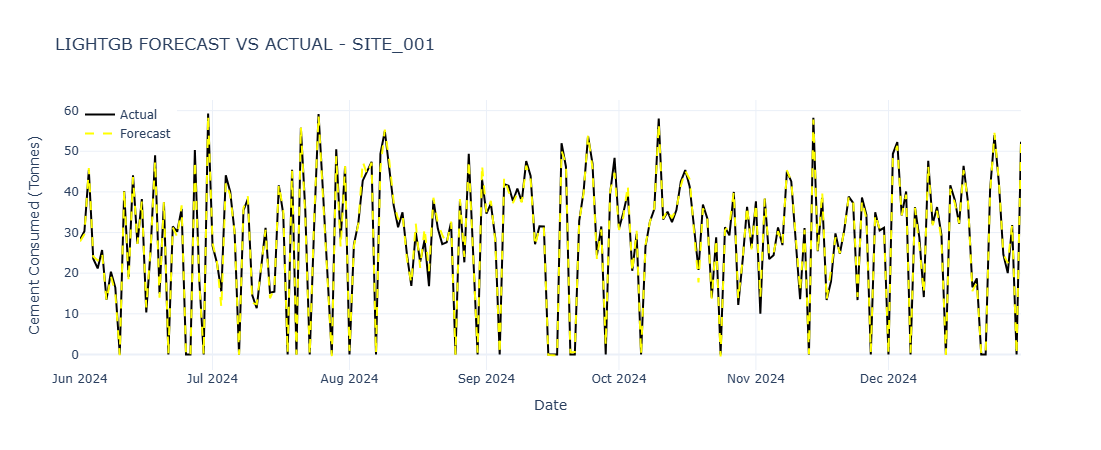

In [445]:
#visualisation Random Forest Forecast Vs actual
import plotly.graph_objects as go


fig = go.Figure()

# Actual Values
fig.add_trace(go.Scatter(
    x=y_test.index,
    y=y_test,
    mode='lines',
    name="Actual",
    line=dict(color='black')
))

# Forecast Values
fig.add_trace(go.Scatter(
    x=y_test.index,
    y=y_pred,
    mode='lines',
    name='Forecast',
    line=dict(color='yellow',dash='dash')
))

# Layout
fig.update_layout(
    title=f'LIGHTGB FORECAST VS ACTUAL - {site_id}',
    xaxis_title="Date",
    yaxis_title="Cement Consumed (Tonnes)",
    legend=dict(x=0, y=1),
    template='plotly_white',
    width=1000,
    height=450
)

fig.show()

In [437]:
# import feature in the dataset

# feat_important = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
# print(feat_important.head(10))

# For LightGBM
feat_important = pd.Series(
    model.feature_importances_, 
    index=model.feature_name_
).sort_values(ascending=False)

print(feat_important.head(10))

planned_pour_tonnes    673
inventory_gap          606
avg_temp_c             258
temp_x_pour            212
rolling_mean_3         157
lag_3                  151
rolling_std_7          143
rain_mm                140
lag_1                  140
week_of_year           131
dtype: int32


In [438]:
import matplotlib.pyplot as plt

# Get feature importances
feat_important = pd.Series(
    model.feature_importances_,
    index=model.feature_name_
).sort_values(ascending=False)

# Print top features
print("Top 10 features:\n", feat_important.head(10))



Top 10 features:
 planned_pour_tonnes    673
inventory_gap          606
avg_temp_c             258
temp_x_pour            212
rolling_mean_3         157
lag_3                  151
rolling_std_7          143
rain_mm                140
lag_1                  140
week_of_year           131
dtype: int32


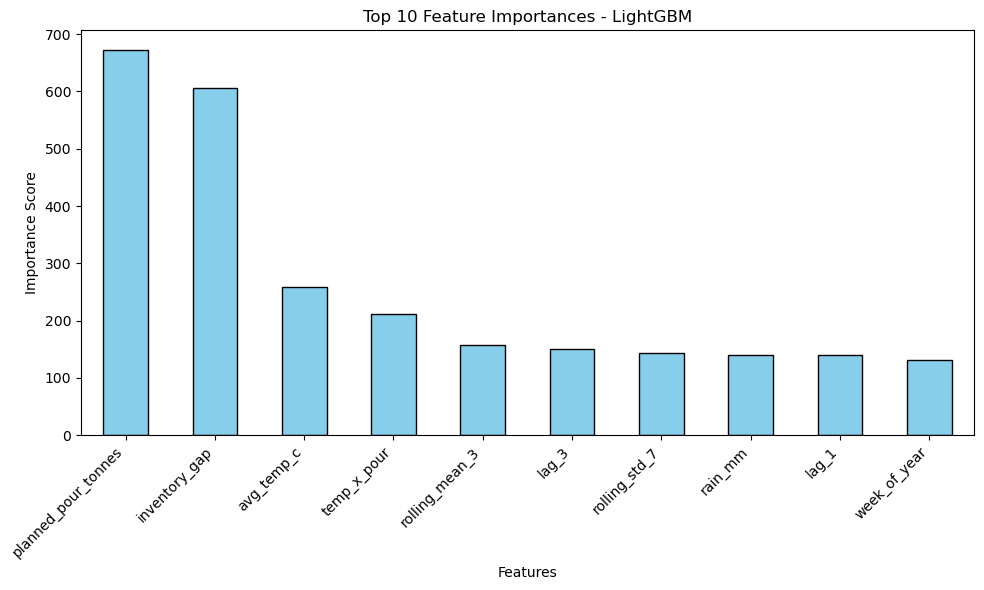

In [439]:
# Plot
fig, ax = plt.subplots(figsize=(10,6))
feat_important.head(10).plot(
    kind='bar', color='skyblue', edgecolor='black', ax=ax
)
ax.set_title("Top 10 Feature Importances - LightGBM")
ax.set_ylabel("Importance Score")
ax.set_xlabel("Features")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

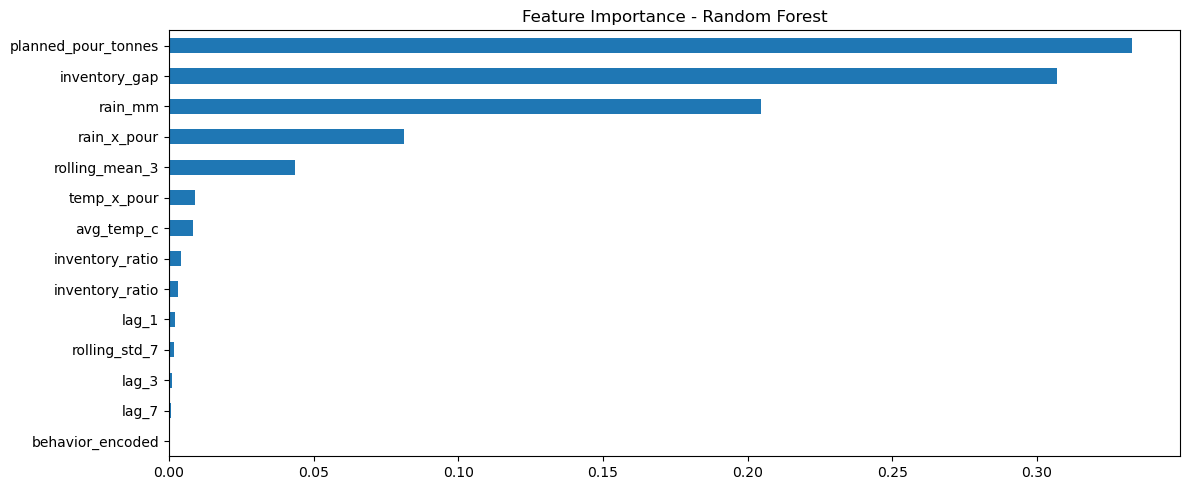

In [440]:
# feature important visualisation

# Feature importance
importance = pd.Series(rf.feature_importances_, index=feature).sort_values()

# Plot
importance.plot(kind='barh', figsize=(12,5), title='Feature Importance - Random Forest')
plt.tight_layout()
plt.show()

In [441]:
df = site_df[feature]
df.to_csv("import_features.csv" ,index = False)

In [442]:
df

,planned_pour_tonnes,rain_mm,avg_temp_c,lag_1,lag_3,lag_7,rolling_mean_3,rolling_std_7,rain_x_pour,temp_x_pour,inventory_gap,inventory_ratio,behavior_encoded,inventory_ratio
date,,,,,,,,,,,,,,
2022-01-29,56.32,5.56,8.11,18.36,46.58,37.96,30.380000,12.893765,313.1392,456.7552,-18.44,0.000000,0,0.000000
2022-01-30,38.81,6.06,11.03,37.88,34.90,40.50,31.683333,12.763188,235.1886,428.0743,3.59,0.008013,0,0.008013
2022-01-31,48.84,10.09,15.06,38.81,18.36,44.98,31.040000,13.073643,492.7956,735.5304,-32.41,0.000000,0,0.000000
2022-02-01,56.70,2.53,19.45,16.43,37.88,13.60,26.753333,11.357484,143.4510,1102.8150,-31.68,0.000000,0,0.000000
2022-02-02,34.65,0.49,12.81,25.02,38.81,46.58,25.366667,9.376824,16.9785,443.8665,8.91,0.019888,0,0.019888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-27,30.74,11.92,6.52,42.11,40.47,16.55,40.230000,21.046227,366.4208,200.4248,-6.13,0.000000,0,0.000000
2024-12-28,30.27,9.21,14.02,24.61,53.97,18.71,28.910000,20.979942,278.7867,424.3854,-10.26,0.000000,0,0.000000
2024-12-29,31.84,5.53,10.27,20.01,42.11,0.00,25.486667,17.615227,176.0752,326.9968,3.10,0.006920,0,0.006920
